##Installing Dependencies


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

##Uploading the dataset

In [24]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Analyse the data

In [25]:
iris.shape

(150, 6)

In [26]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
n1 = len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n1)
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of setosa in Dataset:",n2)
n3 = len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n3)

No of Versicolor in Dataset: 50
No of setosa in Dataset: 50
No of Virginica in Dataset: 50


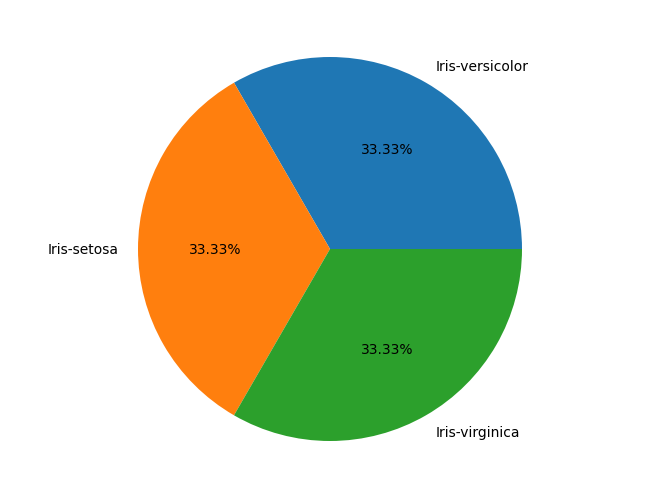

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

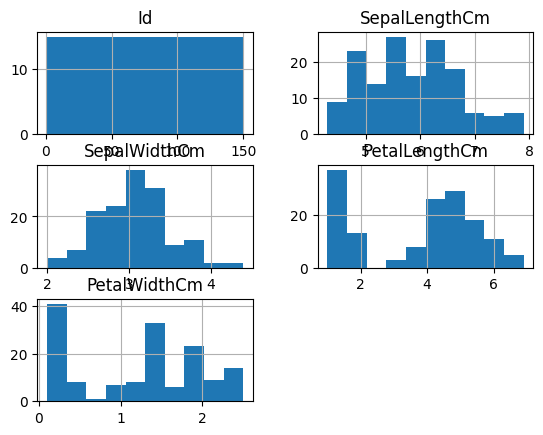

In [30]:
iris.hist()
plt.show()

##Train test Split

In [31]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [32]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [33]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
18,5.7,3.8,1.7,0.3
99,5.7,2.8,4.1,1.3
13,4.3,3.0,1.1,0.1
82,5.8,2.7,3.9,1.2


In [34]:
test_y.head()

106     Iris-virginica
64     Iris-versicolor
130     Iris-virginica
144     Iris-virginica
52     Iris-versicolor
Name: Species, dtype: object

##Support Vector Classifier

In [38]:
model1 = SVC()
model1.fit(train_X, train_y)
prediction1 = model1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction1,test_y))
confusion_mat1 = confusion_matrix(test_y,prediction1)
print("Confusion matrix: \n",confusion_mat1)
print(classification_report(test_y,prediction1))

Accuracy: 0.9333333333333333
Confusion matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  3 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



##Gaussian Naive Baise

In [39]:
model2 = GaussianNB()
model2.fit(train_X, train_y)
prediction2 = model2.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction2,test_y))
confusion_mat2 = confusion_matrix(test_y,prediction2)
print("Confusion matrix: \n",confusion_mat2)
print(classification_report(test_y,prediction2))

Accuracy: 0.9333333333333333
Confusion matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  3 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



##Stochastic Gradient Descent Classifier

In [40]:
model3 = SGDClassifier()
model3.fit(train_X, train_y)
prediction3 = model3.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction3,test_y))
confusion_mat3 = confusion_matrix(test_y,prediction3)
print("Confusion matrix: \n",confusion_mat3)
print(classification_report(test_y,prediction3))

Accuracy: 0.9333333333333333
Confusion matrix: 
 [[13  0  0]
 [ 0 13  3]
 [ 0  0 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.84      1.00      0.91        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



##KNeighbours Classifier

In [41]:
model4 = KNeighborsClassifier()
model4.fit(train_X, train_y)
prediction4 = model4.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction4,test_y))
confusion_mat4 = confusion_matrix(test_y,prediction4)
print("Confusion matrix: \n",confusion_mat4)
print(classification_report(test_y,prediction4))

Accuracy: 0.9555555555555556
Confusion matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  2 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



##Decision Tree

In [42]:
model5 = DecisionTreeClassifier()
model5.fit(train_X, train_y)
prediction5 = model5.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction5,test_y))
confusion_mat5 = confusion_matrix(test_y,prediction5)
print("Confusion matrix: \n",confusion_mat5)
print(classification_report(test_y,prediction5))

Accuracy: 0.9111111111111111
Confusion matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  4 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.80      1.00      0.89        16
 Iris-virginica       1.00      0.75      0.86        16

       accuracy                           0.91        45
      macro avg       0.93      0.92      0.92        45
   weighted avg       0.93      0.91      0.91        45



##Random Forest

In [43]:
model6 = RandomForestClassifier()
model6.fit(train_X, train_y)
prediction6 = model6.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction6,test_y))
confusion_mat6 = confusion_matrix(test_y,prediction5)
print("Confusion matrix: \n",confusion_mat6)
print(classification_report(test_y,prediction6))

Accuracy: 0.9111111111111111
Confusion matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  4 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.80      1.00      0.89        16
 Iris-virginica       1.00      0.75      0.86        16

       accuracy                           0.91        45
      macro avg       0.93      0.92      0.92        45
   weighted avg       0.93      0.91      0.91        45

